# WEEK 6 - Segment wise insights and cohort analysis

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("preprocessed_kids_screen_time.csv")
df.head(7)

,Age,Age_group,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Device_Type,Screen_Size,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Health_Status,Urban_or_Rural
0,14,Teenagers,Male,3.99,Smartphone,Portable,<30,True,0.42,"Poor Sleep, Eye Strain","Mental, Physical",Urban
1,11,Pre-Teens,Female,4.61,Laptop,Portable,<30,True,0.30,Poor Sleep,Mental,Urban
2,18,Late Teens,Female,3.73,TV,Fixed,>=30,True,0.32,Poor Sleep,Mental,Urban
3,15,Teenagers,Female,1.21,Laptop,Portable,<30,False,0.39,No Health Impacts,No Health Impacts,Urban
4,12,Pre-Teens,Female,5.89,Smartphone,Portable,<30,True,0.49,"Poor Sleep, Anxiety",Mental,Urban
5,14,Teenagers,Female,4.88,Smartphone,Portable,<30,True,0.44,Poor Sleep,Mental,Urban
6,17,Late Teens,Male,2.97,TV,Fixed,>=30,False,0.48,No Health Impacts,No Health Impacts,Rural


In [44]:
# Average screen time across key segments
seg_summary = df.groupby(['Age_group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].agg(['mean','median','count']).reset_index()
seg_summary = seg_summary.sort_values('mean', ascending=False)
display(seg_summary.head(7))

,Age_group,Primary_Device,mean,median,count
10,Teenagers,TV,4.586816,4.620,735
3,Late Teens,Tablet,4.555843,4.565,166
0,Late Teens,Laptop,4.548735,4.665,340
1,Late Teens,Smartphone,4.539220,4.530,885
9,Teenagers,Smartphone,4.507969,4.520,1758
2,Late Teens,TV,4.477568,4.500,366
11,Teenagers,Tablet,4.461235,4.470,340


In [45]:
# Segment-wise Summary Tables

print(" Average Screen Time by Age Group:")
print(df.groupby("Age_group")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

print("Average Screen Time by Gender:")
print(df.groupby("Gender")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

print("Average Screen Time by Device Type:")
print(df.groupby("Device_Type")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

print("Average Screen Time by Health Status:")
print(df.groupby("Health_Status")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

print("Average Screen Time by Urban/Rural Segment:")
print(df.groupby("Urban_or_Rural")["Avg_Daily_Screen_Time_hr"].mean().round(2), "\n")

 Average Screen Time by Age Group:
Age_group
Late Teens    4.53
Pre-Teens     4.19
Teenagers     4.50
Name: Avg_Daily_Screen_Time_hr, dtype: float64 

Average Screen Time by Gender:
Gender
Female    4.35
Male      4.39
Name: Avg_Daily_Screen_Time_hr, dtype: float64 

Average Screen Time by Device Type:
Device_Type
Fixed       4.30
Portable    4.39
Name: Avg_Daily_Screen_Time_hr, dtype: float64 

Average Screen Time by Health Status:
Health_Status
Mental               4.94
Mental, Physical     4.91
No Health Impacts    3.25
Physical             4.85
Name: Avg_Daily_Screen_Time_hr, dtype: float64 

Average Screen Time by Urban/Rural Segment:
Urban_or_Rural
Rural    4.38
Urban    4.36
Name: Avg_Daily_Screen_Time_hr, dtype: float64 



In [23]:
# Age Group × Gender
df.groupby(['Age_group', 'Gender'])['Avg_Daily_Screen_Time_hr'].mean()

# Device Type × Age Group
df.groupby(['Device_Type', 'Age_group'])['Avg_Daily_Screen_Time_hr'].mean()

# Health Status × Age Group
df.groupby(['Health_Status', 'Age_group'])['Avg_Daily_Screen_Time_hr'].mean()

# Urban/Rural × Device Type
df.groupby(['Urban_or_Rural', 'Device_Type'])['Avg_Daily_Screen_Time_hr'].mean()

Urban_or_Rural  Device_Type
Rural           Fixed          4.299583
                Portable       4.402408
Urban           Fixed          4.299527
                Portable       4.386671
Name: Avg_Daily_Screen_Time_hr, dtype: float64

In [24]:
# Mean screen time by each health status
df.groupby('Health_Status')['Avg_Daily_Screen_Time_hr'].mean()

# Compare mental vs. no health impacts
df.pivot_table(index='Health_Status', values='Avg_Daily_Screen_Time_hr', aggfunc='mean')

,Avg_Daily_Screen_Time_hr
Health_Status,
Mental,4.941345
"Mental, Physical",4.914466
No Health Impacts,3.245264
Physical,4.849780


In [25]:
# Standard deviation (variability)
df.groupby('Age_group')['Avg_Daily_Screen_Time_hr'].agg(['mean', 'std', 'min', 'max']

,mean,std,min,max
Age_group,,,,
Late Teens,4.529789,1.214399,0.00,8.27
Pre-Teens,4.193420,2.150401,0.00,13.89
Teenagers,4.502399,1.189260,0.16,8.74


In [40]:
corr_table = df.corr(numeric_only=True).round(2)
corr_table

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.00,0.11,0.15,-0.49
Avg_Daily_Screen_Time_hr,0.11,1.00,0.66,-0.08
Exceeded_Recommended_Limit,0.15,0.66,1.00,-0.12
Educational_to_Recreational_Ratio,-0.49,-0.08,-0.12,1.00


In [46]:
variance_table = (
    df.groupby('Device_Type')['Avg_Daily_Screen_Time_hr']
    .agg(['mean', 'std'])
    .assign(Variance_Index=lambda x: (x['std'] / x['mean']).round(2))
)
variance_table

,mean,std,Variance_Index
Device_Type,,,
Fixed,4.299544,1.914434,0.45
Portable,4.391298,1.623247,0.37


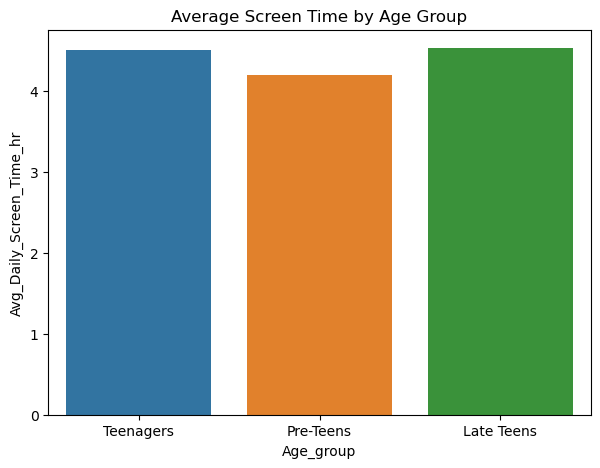

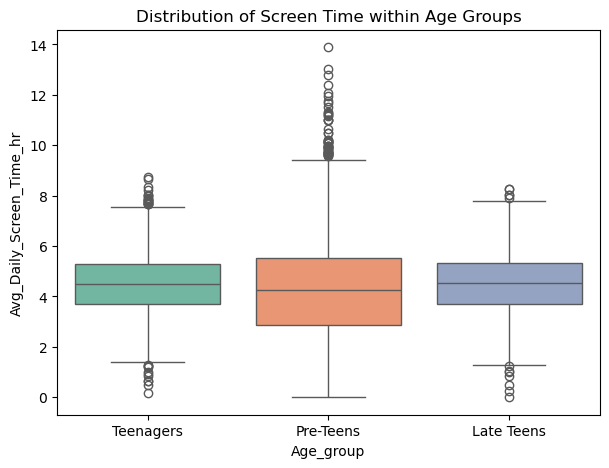

Insight:
Teenagers and Late Teens have the highest average screen time (~4.5 hrs), while Pre-Teens spend the least (~4.2 hrs).
Older age groups have more autonomy and access, driving longer usage times.



In [6]:
# Age Group vs Screen Time (Bar + Boxplot)

plt.figure(figsize=(7,5))
sns.barplot(x="Age_group", y="Avg_Daily_Screen_Time_hr", hue="Age_group", data=df, errorbar=None)
plt.title("Average Screen Time by Age Group")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x="Age_group", y="Avg_Daily_Screen_Time_hr", hue="Age_group",data=df, palette="Set2")
plt.title("Distribution of Screen Time within Age Groups")
plt.show()

print("Insight:")
print("Teenagers and Late Teens have the highest average screen time (~4.5 hrs), while Pre-Teens spend the least (~4.2 hrs).")
print("Older age groups have more autonomy and access, driving longer usage times.\n")

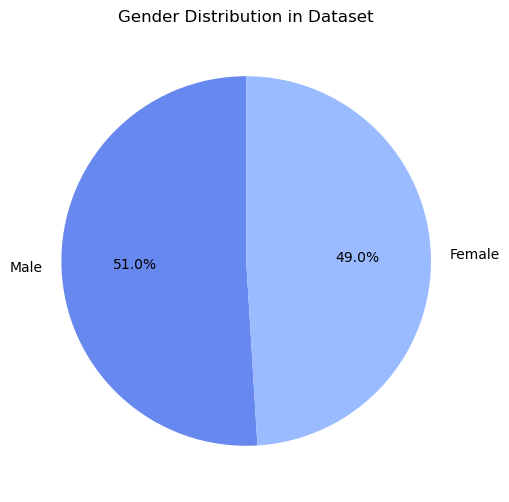

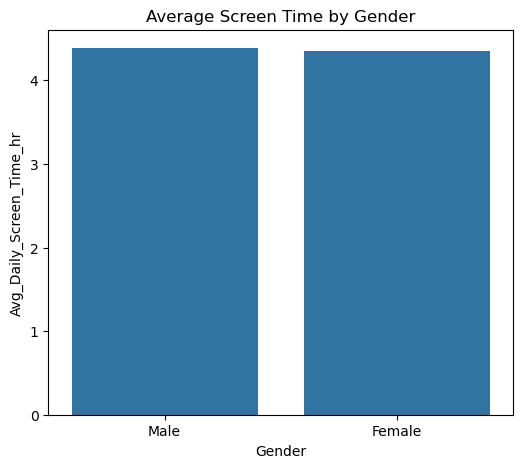

Insight:
Males (~4.39 hrs) and Females (~4.35 hrs) spend almost equal time on screens.
This shows that digital behavior is now balanced across genders, with no major differences.



In [8]:
#  Gender vs Screen Time (Pie + Bar)

# Pie Chart
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm"))
plt.title("Gender Distribution in Dataset")
plt.show()

# Bar Chart
plt.figure(figsize=(6,5))
sns.barplot(x="Gender", y="Avg_Daily_Screen_Time_hr", data=df, errorbar=None)
plt.title("Average Screen Time by Gender")
plt.show()

print("Insight:")
print("Males (~4.39 hrs) and Females (~4.35 hrs) spend almost equal time on screens.")
print("This shows that digital behavior is now balanced across genders, with no major differences.\n")

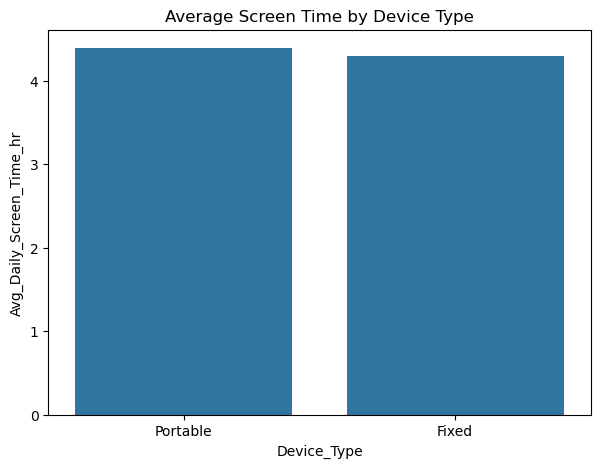

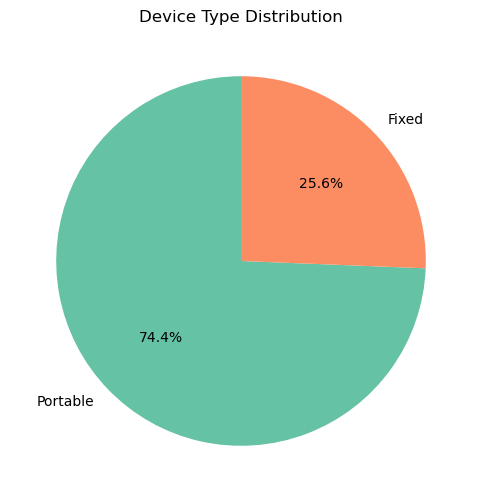

Insight:
Portable device users (~4.39 hrs) spend more time than fixed device users (~4.30 hrs).
Portability leads to more frequent usage, making it a major factor in high screen exposure.



In [43]:
# Device Type vs Screen Time

plt.figure(figsize=(7,5))
sns.barplot(x="Device_Type", y="Avg_Daily_Screen_Time_hr", data=df, errorbar=None)
plt.title("Average Screen Time by Device Type")
plt.show()

# Pie chart for distribution
device_counts = df["Device_Type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Device Type Distribution")
plt.show()

print("Insight:")
print("Portable device users (~4.39 hrs) spend more time than fixed device users (~4.30 hrs).")
print("Portability leads to more frequent usage, making it a major factor in high screen exposure.\n")

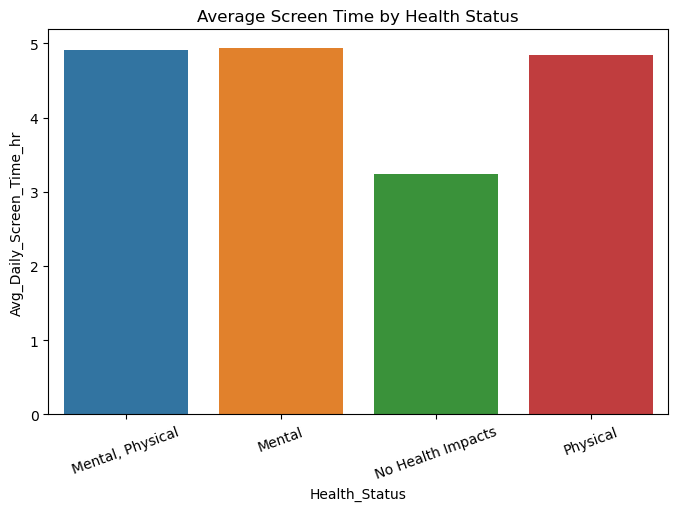

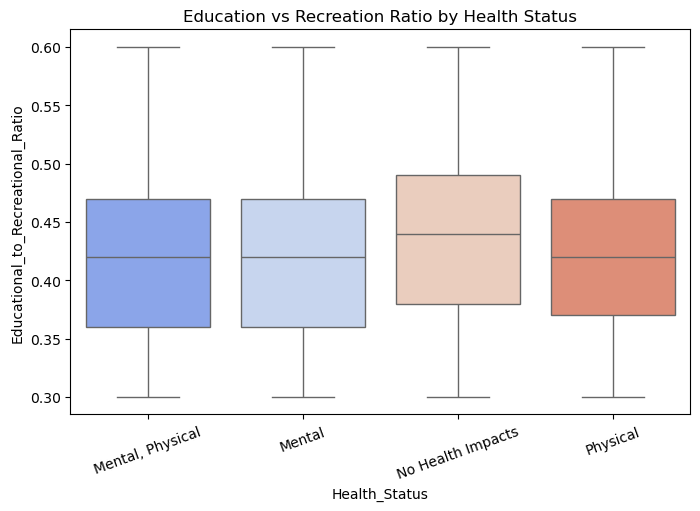

 Insight:
People with mental or physical health issues have the highest screen time (~4.9 hrs).
High exposure correlates with reduced physical activity and mental fatigue, suggesting an unhealthy screen-use pattern.



In [47]:
# Health Status vs Screen Time

plt.figure(figsize=(8,5))
sns.barplot(x="Health_Status", y="Avg_Daily_Screen_Time_hr", hue="Health_Status", data=df, errorbar=None)
plt.title("Average Screen Time by Health Status")
plt.xticks(rotation=20)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Health_Status", y="Educational_to_Recreational_Ratio",hue="Health_Status", data=df, palette="coolwarm")
plt.title("Education vs Recreation Ratio by Health Status")
plt.xticks(rotation=20)
plt.show()

print(" Insight:")
print("People with mental or physical health issues have the highest screen time (~4.9 hrs).")
print("High exposure correlates with reduced physical activity and mental fatigue, suggesting an unhealthy screen-use pattern.\n")

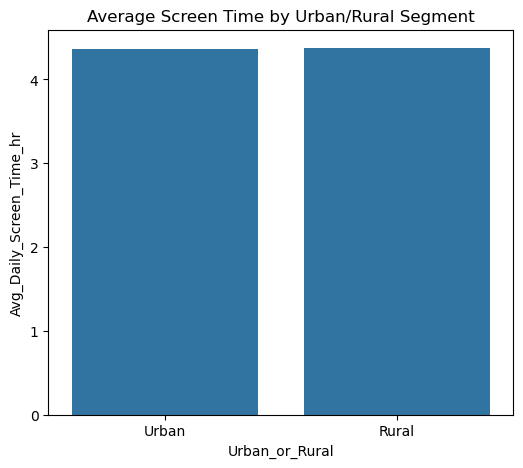

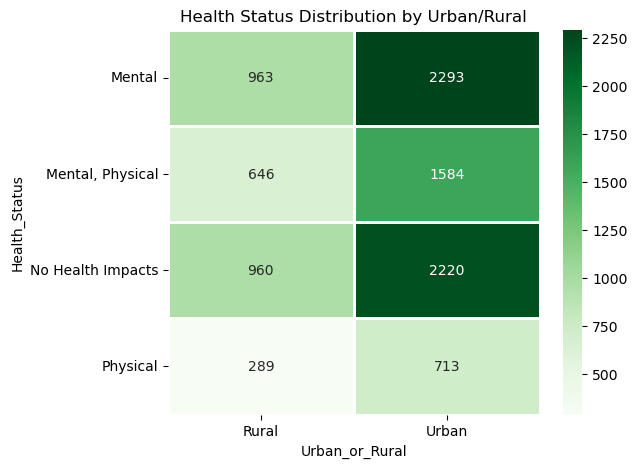

Insight:
Screen time between Urban (~4.36 hrs) and Rural (~4.38 hrs) users is nearly identical.
Technology access has equalized, bridging the digital divide between cities and rural areas.



In [27]:
# Urban vs Rural

plt.figure(figsize=(6,5))
sns.barplot(x="Urban_or_Rural", y="Avg_Daily_Screen_Time_hr", data=df, errorbar=None)
plt.title("Average Screen Time by Urban/Rural Segment")
plt.show()

# Heatmap of health status distribution by location
ct = pd.crosstab(df["Health_Status"], df["Urban_or_Rural"])
plt.figure(figsize=(6,5))
sns.heatmap(ct, annot=True, fmt="d", cmap="Greens", linewidths=1, linecolor="white")
plt.title("Health Status Distribution by Urban/Rural")
plt.show()

print("Insight:")
print("Screen time between Urban (~4.36 hrs) and Rural (~4.38 hrs) users is nearly identical.")
print("Technology access has equalized, bridging the digital divide between cities and rural areas.\n")

In [35]:
insight_table = pd.DataFrame({
    "Segment": ["Age Group", "Gender", "Device Type", "Health Status", "Urban/Rural"],
    "Key Finding": [
        "Late Teens have the highest screen time (4.53 hr)",
        "Males and Females show minimal difference",
        "Portable devices lead over Fixed devices",
        "Mental health groups record highest averages",
        "Urban and Rural averages nearly identical"
    ]
})
insight_table

,Segment,Key Finding
0,Age Group,Late Teens have the highest screen time (4.53 hr)
1,Gender,Males and Females show minimal difference
2,Device Type,Portable devices lead over Fixed devices
3,Health Status,Mental health groups record highest averages
4,Urban/Rural,Urban and Rural averages nearly identical


### Key Drivers of High/Low Screen Time

 **High Screen Time Drivers:**
- Users with **mental or physical health issues** (around 4.9 hrs).  
- **Portable device users**, who use screens more frequently throughout the day.  
- **Older age groups** (Teenagers and Late Teens) with more independent access.  

 **Low Screen Time Drivers:**
- Users with **no health impacts** (≈3.25 hrs).  
- **Younger users (Pre-Teens)** who have limited screen access and more parental control.  
- **Fixed device users**, as desktops/laptops are often used only for specific tasks like study or work.


##  Final Cohort Insights (Integrated Summary)

Overall, screen time patterns show clear behavioral trends:
- **Health condition** and **device type** are the strongest influencers of screen time.  
- **Age** also plays a significant role, with older individuals spending more hours online.  
- **Gender and location** have very little impact — digital behavior is becoming uniform across these segments.  
- High screen time correlates with **negative health indicators**, suggesting a need for balance and digital wellness awareness.